<a href="https://colab.research.google.com/github/aadityadamle/NLP-Course/blob/main/Chunking_and_Chinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

#Chunking and Chinking
After POS tagging the next step to move towards entity detection is chunking, which segments and labels multi-token sequences. A chunk may contain small - level tokens and even the POS tags added in the earlier step. Chunking basically selects a subset of the tokens. The chunks in a text are separate from one another and do not overlap in the source text.

We can use chunkers to select the parts of the text which we require from the entire text. For example we can obtain chunks containing Noun phrases only. This is called as noun phrase chunking.

The chunking process is a little bit same as using regular expressions. Firstly, you take a tagged or annotated text. Then define a rule or set of rules which will be used for chunking the text. Unlike in regular expressions, the POS tags are used to form patterns for the rules in chunking. All the Regular Expression modifiers can be used here to form rules. Then we feed all these rules to a chunker and use it to parse a piece of text.



Below I have used Noun phrase chunker on the first example sentence at the begining of this lesson. In POS Tagging output the words "phone" "side" "room" were tagged as nouns.

In [3]:
# Tokenize the text
text = nltk.word_tokenize("I left my phone on the left side of the room.")

# POS Tag the text
tagged_text = nltk.pos_tag(text)
print(tagged_text)

# Define the rule/s for chunking 
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Create a chunker and apply it on the
chunker = nltk.RegexpParser(grammar)
chunked_text = chunker.parse(tagged_text)
print(chunked_text)

[('I', 'PRP'), ('left', 'VBD'), ('my', 'PRP$'), ('phone', 'NN'), ('on', 'IN'), ('the', 'DT'), ('left', 'JJ'), ('side', 'NN'), ('of', 'IN'), ('the', 'DT'), ('room', 'NN'), ('.', '.')]
(S
  I/PRP
  left/VBD
  my/PRP$
  (NP phone/NN)
  on/IN
  (NP the/DT left/JJ side/NN)
  of/IN
  (NP the/DT room/NN)
  ./.)


The chunker has successfully chunked the three noun phrases in the sentence. The following diagram illustrates chunking operation using the above example.

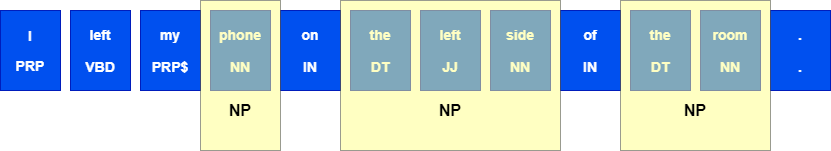

Chinking is used to exclude a part from a chunk. A Chink is defined as a sequence of tokens that is not included in a chunk. Chinking is the process of removing a sequence of tokens from a chunk. There are three possible cases in chinking:


1.   If the matching sequence of tokens makes up an entire chunk, then the whole chunk is removed.

2. If the sequence of tokens appears in the middle of the chunk then those tokens are removed, leaving two chunks.

3. If the sequence is at the periphery of the chunk, these tokens are removed, and a smaller chunk remains.

The illustration below describes the above cases. I have used the middle chunk from the above example i.e. "the left side".

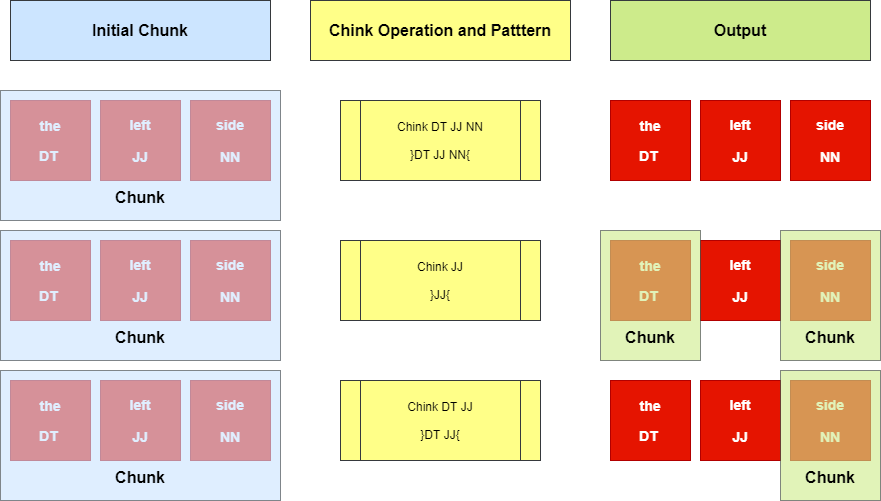

Now let's see the code to do this.

In [4]:
# Tokenize the text
text = nltk.word_tokenize("the left side")

# POS Tag the text
tagged_text = nltk.pos_tag(text)
print(tagged_text)

# Define the rule/s for chunking and chinking
# Case 1
grammar1 = """NP: {<.*>+}
               }<DT|JJ|NN>+{"""

chunker = nltk.RegexpParser(grammar1)
chunked_text1 = chunker.parse(tagged_text)
print("Case 1:", chunked_text1)

# Case 2
grammar2 = """NP: {<.*>+}
               }<JJ>+{"""

chunker = nltk.RegexpParser(grammar2)
chunked_text2 = chunker.parse(tagged_text)
print("Case 2:", chunked_text2)

# Case 3 
grammar3 = """NP: {<.*>+}
               }<DT|JJ>+{"""

chunker = nltk.RegexpParser(grammar3)
chunked_text3 = chunker.parse(tagged_text)
print("Case 3:", chunked_text3)

[('the', 'DT'), ('left', 'JJ'), ('side', 'NN')]
Case 1: (S the/DT left/JJ side/NN)
Case 2: (S (NP the/DT) left/JJ (NP side/NN))
Case 3: (S the/DT left/JJ (NP side/NN))


NLTK provides a built-in chunker for Named Entity Recognition. Let's see how it works on second example where the polish can be verb or name of language i.e. a named entity.

In [5]:
# Tokenize the text
text = nltk.word_tokenize("He's got to polish up his Polish for his job.")

# POS Tag the text
tagged_text = nltk.pos_tag(text)
print(tagged_text)

# Use NE chunker
namedEntity = nltk.ne_chunk(tagged_text)
print(namedEntity)

[('He', 'PRP'), ("'s", 'VBZ'), ('got', 'VBD'), ('to', 'TO'), ('polish', 'VB'), ('up', 'RP'), ('his', 'PRP$'), ('Polish', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('job', 'NN'), ('.', '.')]
(S
  He/PRP
  's/VBZ
  got/VBD
  to/TO
  polish/VB
  up/RP
  his/PRP$
  (GPE Polish/NN)
  for/IN
  his/PRP$
  job/NN
  ./.)


The output shows that the two instances of the word "polish" are identified correctly and the chunker has identified the correct type of the named entity as well - Geo Political Entity.

## Reference :
http://www.nltk.org/book/ch05.html